## Plot the images for Paper

In [1]:
from tensorboard.backend.event_processing import event_accumulator, event_multiplexer
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from typing import List
import math

os.chdir('../')
sys.path.append('./')
os.getcwd()

'/home/best/GeNet'

### Train step

In [2]:
# log_dir = './out/logs'
# parsers = ['train', 'val', 'test']
# tags = ['_acc', '_loss']
# dataset_names = ['cifar10', 'mnist']
# ea = event_multiplexer.EventMultiplexer().AddRunsFromDirectory(log_dir)
# ea.Reload()
# ea.Scalars('GAT_CIFAR10_03h57m06s_on_Mar_15_2024_PC', 'train/_acc')
# for dataset_name in dataset_names:
#     for parser in parsers:
#         if parser == 'test':
#             tags = ['_acc']
#         else:
#             tags = ['_acc', '_loss']
                    
#         for tag in tags:
#             f = plt.figure('dataset_names' + '_' + parser + '_' + tag, figsize=(10, 5))
#             for run in ea.Runs().keys():
#                 if dataset_name.upper() in run:
#                     sc = ea.Scalars(run, parser + '/' + tag)
#                     plt.plot([s.step for s in sc], [s.value for s in sc])
#             plt.show()
        

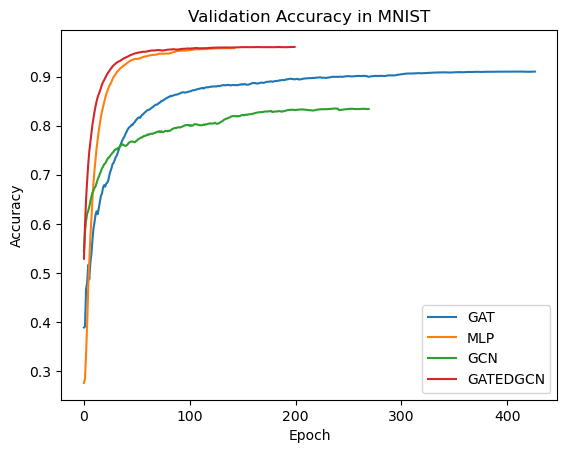

In [5]:
out_dir = './demo/plot_visualization/'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

dataset_name = 'cifar10'
dataset_name = 'mnist'
log_dir = './out/logs'
parser = 'val'
tag = '_acc'
ea = event_multiplexer.EventMultiplexer().AddRunsFromDirectory(log_dir)
ea.Reload()
import pandas as pd
plt.figure()
for run in ea.Runs().keys():
    if dataset_name.upper() in run:
        sc = ea.Scalars(run, parser + '/' + tag)
        df = pd.Series(data=[s.value for s in sc], index=[s.step for s in sc])
        smooth = df.ewm(alpha= 1 - 0.9).mean()
        model_name = run.split('_')[0]
   
        plt.plot([s for s in smooth.index], [s for s in smooth.values], label=model_name)   
        
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy in ' + dataset_name.upper())
plt.xticks(np.linspace(0, 400, 5))
plt.show()
# plt.savefig(out_dir + dataset_name + '_' + parser  + tag + '.png')